# 3 Qubits Model - RGB representation

Additional requirements:
```
- Pillow >= 7.1.2
```

___

In this notebook, a simple 3-dimensional AngularModel is tested. RGB colors are used to represent the 3-dimensional vector of input data.

In [1]:
from qrobot.models import AngularModel

`demo_RGB_utils.py` contains a `Plotter` class which implements useful methods to plot the data:

In [2]:
from demo_RGB_utils import Plotter
plotter = Plotter()

We start by defining an arbirary input:

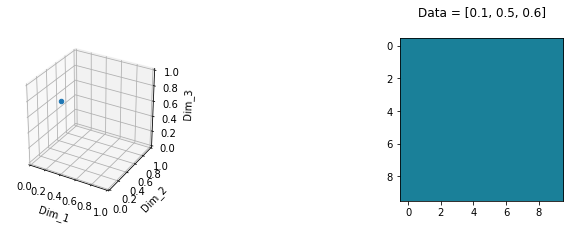

In [3]:
input_data = [.1,.5,.6]
plotter.plot_data(input_data)

We initialize then the model with $(n, \tau) = (3,1)$ and we encode in it the single input data ($\tau = 1$)

In [4]:
model = AngularModel(3,1)

for i in range(0,model.n):
    model.encode(input_data[i],dim=i+1)
    
model.print()

     ┌───────────┐
q_0: ┤ RY(pi/10) ├
     └┬──────────┤
q_1: ─┤ RY(pi/2) ├
     ┌┴──────────┤
q_2: ┤ RY(3pi/5) ├
     └───────────┘
c_0: ═════════════
                  
c_1: ═════════════
                  
c_2: ═════════════
                  


Given the input we defined above, the model is in the following state:

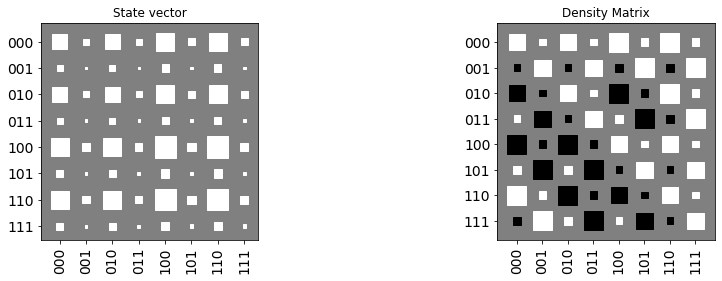

In [5]:
model.plot_state()

**Density matrix** (from [Wikipedia](https://en.wikipedia.org/wiki/Density_matrix)): or a finite-dimensional function space, the most general density operator is of the form

$$\rho =\sum _{j}p_{j}|\psi _{j}\rangle \langle \psi _{j}|$$

where the coefficients $p_{j}$ are non-negative and add up to one, and $|\psi _{j}\rangle \langle \psi _{j}|$ is an outer product written in bra-ket notation. This represents a mixed state, with probability $ p_{j}$ that the system is in the pure state $|\psi _{j}\rangle $

### $-$ Measurement simulation

In [6]:
shots = 1000000
counts = model.measure(shots)

In [7]:
import json
print("Aggregated binary outcomes of the circuit:")
print(json.dumps(counts, sort_keys=True, indent=4))

Aggregated binary outcomes of the circuit:
{
    "000": 168240,
    "001": 4143,
    "010": 168708,
    "011": 4213,
    "100": 319667,
    "101": 7953,
    "110": 319027,
    "111": 8049
}


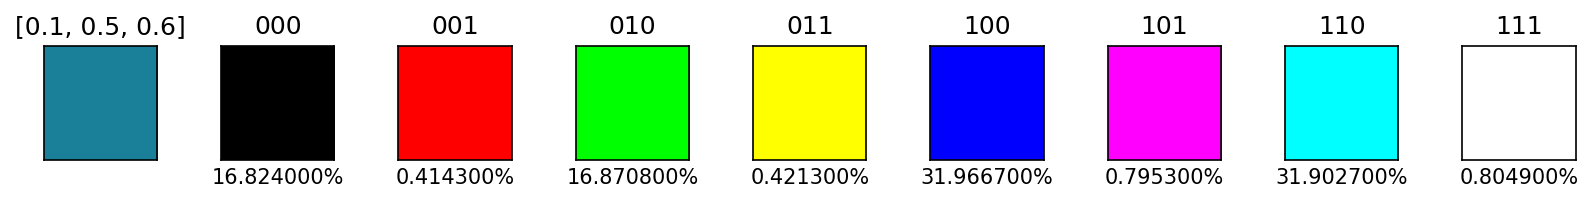

In [8]:
plotter.plot_result(input_data, counts, shots)